# Step 1: Prepare Data

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulated dataset for the experiment
data = {
    'Model': ['LLM1', 'LLM1', 'LLM2', 'LLM2', 'LLM3', 'LLM3', 'LLM1', 'LLM1', 'LLM2', 'LLM2', 'LLM3', 'LLM3'],
    'Mode_of_Expression': ['Numeric/symbolic', 'English words', 'Numeric/symbolic', 'English words', 'Numeric/symbolic', 'English words',
                           'Numeric/symbolic', 'English words', 'Numeric/symbolic', 'English words', 'Numeric/symbolic', 'English words'],
    'Type_of_Task': ['Arithmetic', 'Arithmetic', 'Arithmetic', 'Arithmetic', 'Multiplication', 'Multiplication',
                     'Algebra', 'Algebra', 'Algebra', 'Algebra', 'Statistics', 'Statistics'],
    'Complexity_of_Task': ['Simple', 'Simple', 'Complex', 'Complex', 'Simple', 'Simple', 'Intermediate', 'Intermediate', 'Complex', 'Complex', 'Intermediate', 'Intermediate'],
    'Correct_Answer': [25, 25, 99947.3, 99947.3, 56, 56, 2, 2, 3.4, 3.4, 4.1, 4.1],
    'LLM_Response': [25, 25, 99947.3, 99947.2, 56, 56, 2, 2, 3.5, 3.3, 4.0, 4.1]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Calculate accuracy
df['Accuracy'] = np.where(df['Correct_Answer'] == df['LLM_Response'], 1, 0)

# Show the dataset
df


,Model,Mode_of_Expression,Type_of_Task,Complexity_of_Task,Correct_Answer,LLM_Response,Accuracy
0,LLM1,Numeric/symbolic,Arithmetic,Simple,25.0,25.0,1
1,LLM1,English words,Arithmetic,Simple,25.0,25.0,1
2,LLM2,Numeric/symbolic,Arithmetic,Complex,99947.3,99947.3,1
3,LLM2,English words,Arithmetic,Complex,99947.3,99947.2,0
4,LLM3,Numeric/symbolic,Multiplication,Simple,56.0,56.0,1
5,LLM3,English words,Multiplication,Simple,56.0,56.0,1
6,LLM1,Numeric/symbolic,Algebra,Intermediate,2.0,2.0,1
7,LLM1,English words,Algebra,Intermediate,2.0,2.0,1
8,LLM2,Numeric/symbolic,Algebra,Complex,3.4,3.5,0
9,LLM2,English words,Algebra,Complex,3.4,3.3,0


# Step 2: Analysis with ANOVA

In [9]:
# ANOVA: Analyze the impact of Mode_of_Expression, Type_of_Task, and Complexity_of_Task on Accuracy

# Define the independent variables as categorical
df['Mode_of_Expression'] = pd.Categorical(df['Mode_of_Expression'])
df['Type_of_Task'] = pd.Categorical(df['Type_of_Task'])
df['Complexity_of_Task'] = pd.Categorical(df['Complexity_of_Task'])

# Perform One-Way ANOVA for Mode of Expression vs Accuracy
anova_mode = stats.f_oneway(df[df['Mode_of_Expression'] == 'Numeric/symbolic']['Accuracy'],
                            df[df['Mode_of_Expression'] == 'English words']['Accuracy'])
print("ANOVA - Mode of Expression:", anova_mode)

# Perform One-Way ANOVA for Type of Task vs Accuracy
anova_task = stats.f_oneway(df[df['Type_of_Task'] == 'Arithmetic']['Accuracy'],
                            df[df['Type_of_Task'] == 'Multiplication']['Accuracy'],
                            df[df['Type_of_Task'] == 'Algebra']['Accuracy'],
                            df[df['Type_of_Task'] == 'Statistics']['Accuracy'])
print("ANOVA - Type of Task:", anova_task)

# Perform One-Way ANOVA for Complexity of Task vs Accuracy
anova_complexity = stats.f_oneway(df[df['Complexity_of_Task'] == 'Simple']['Accuracy'],
                                  df[df['Complexity_of_Task'] == 'Intermediate']['Accuracy'],
                                  df[df['Complexity_of_Task'] == 'Complex']['Accuracy'])
print("ANOVA - Complexity of Task:", anova_complexity)


ANOVA - Mode of Expression: F_onewayResult(statistic=0.0, pvalue=1.0)
ANOVA - Type of Task: F_onewayResult(statistic=0.4938271604938271, pvalue=0.6964679216956741)
ANOVA - Complexity of Task: F_onewayResult(statistic=3.4999999999999987, pvalue=0.07508468627929694)


# Step 3: Visualizing the Results

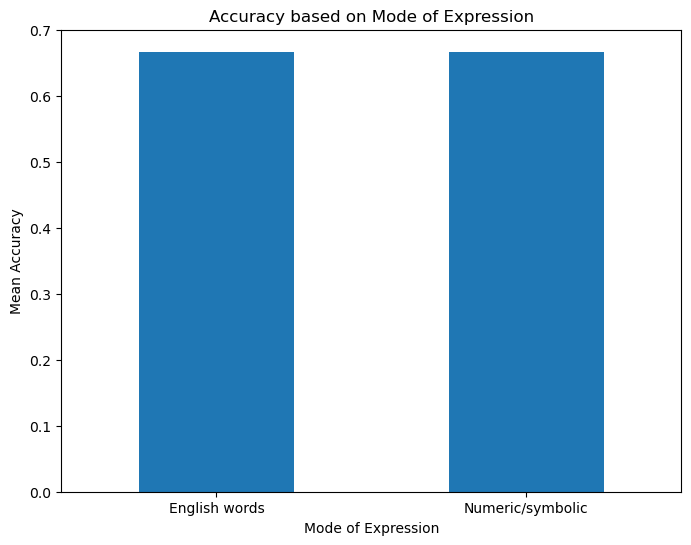

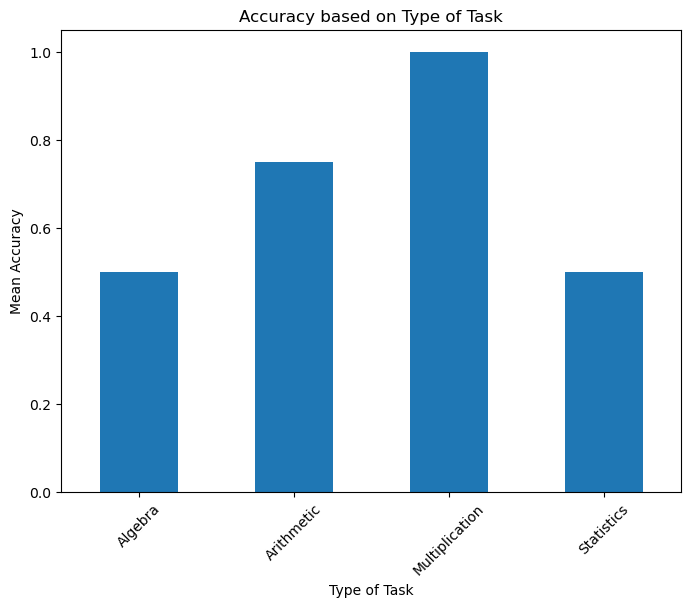

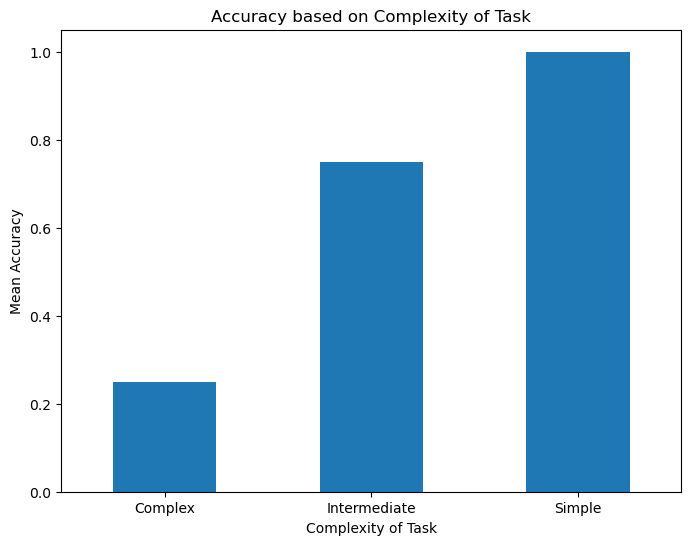

In [14]:
import matplotlib.pyplot as plt

# Plotting Mode of Expression vs Accuracy
plt.figure(figsize=(8, 6))
df.groupby('Mode_of_Expression', observed=True)['Accuracy'].mean().plot(kind='bar')
plt.title('Accuracy based on Mode of Expression')
plt.xlabel('Mode of Expression')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=0)
plt.show()

# Plotting Type of Task vs Accuracy
plt.figure(figsize=(8, 6))
df.groupby('Type_of_Task', observed=True)['Accuracy'].mean().plot(kind='bar')
plt.title('Accuracy based on Type of Task')
plt.xlabel('Type of Task')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plotting Complexity of Task vs Accuracy
plt.figure(figsize=(8, 6))
df.groupby('Complexity_of_Task', observed=True)['Accuracy'].mean().plot(kind='bar')
plt.title('Accuracy based on Complexity of Task')
plt.xlabel('Complexity of Task')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=0)
plt.show()
